In [20]:
import pandas as pd
import matplotlib.pyplot as plt


#1 Leer la URL desde github del archivo llamado clientes.csv y conocer su informacion principal mediante el uso de atributos y metodos necesarios de pandas.
file_url = "https://raw.githubusercontent.com/rubisabel00/ciencias-de-datos-Sena/main/DocumentosNB03/clientes.csv"
try:
    df = pd.read_csv(file_url, encoding='utf-8', sep=',')
    print("Archivo cargado correctamente")
    print(df.head())
    print(df.info())
    
except Exception as e:
    print(f"Error al leer el archivo: {e}")
    


Matplotlib is building the font cache; this may take a moment.


Archivo cargado correctamente
   ID del cliente           Nombre Última fecha de compra  \
0               1       Juan Perez             15/03/2022   
1               2    Ana Rodriguez             01/04/2022   
2               3  Luisa Hernandez             10/12/2021   
3               4    Carlos Garcia             28/02/2022   
4               5      Maria Gomez             20/03/2022   

   Frecuencia de compra  Valor promedio de la compra  \
0                     5                        200.5   
1                     2                         80.0   
2                     3                        150.2   
3                     1                        300.0   
4                     4                         75.8   

  Categoría de productos comprados          Método de pago  Edad  
0                             Ropa      Tarjeta de crédito  32.0  
1                         Juguetes                Efectivo  45.0  
2                      Electrónica  Transferencia bancaria  28.0 

In [21]:
#2Realizar una descripcion estadistica de la informacion encontrada y normalizarla (Eliminar los null).
print(df.describe())
df_limpio = df.dropna()

       ID del cliente  Frecuencia de compra  Valor promedio de la compra  \
count      157.000000            157.000000                    152.00000   
mean        82.579618              2.369427                    118.23750   
std         47.555248              1.172804                    249.86509   
min          1.000000              1.000000                     20.00000   
25%         42.000000              1.000000                     65.20000   
50%         83.000000              2.000000                     85.10000   
75%        124.000000              3.000000                    120.28750   
max        161.000000              5.000000                   3110.00000   

             Edad  
count  154.000000  
mean    31.233766  
std      9.146443  
min      1.000000  
25%     26.000000  
50%     30.000000  
75%     37.000000  
max     80.000000  


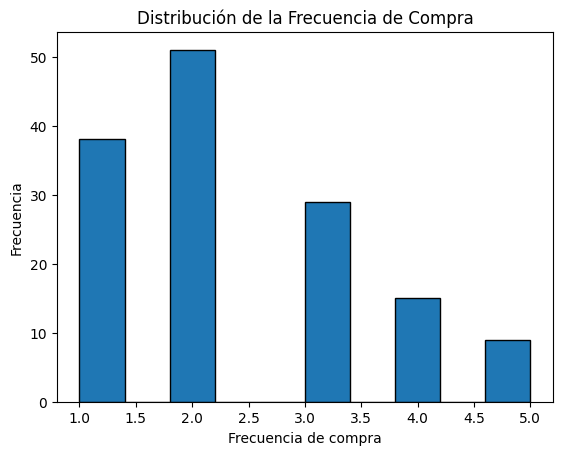

In [23]:
#3Generar una grafica representativa de la informacion obtenida.

if 'Frecuencia de compra' in df_limpio.columns:
    df_limpio['Frecuencia de compra'] = pd.to_numeric(df_limpio['Frecuencia de compra'], errors='coerce') 
    df_limpio = df_limpio.dropna(subset=['Frecuencia de compra'])  
    
    plt.hist(df_limpio['Frecuencia de compra'], bins=10, edgecolor='black')
    plt.title('Distribución de la Frecuencia de Compra')
    plt.xlabel('Frecuencia de compra')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("Error: La columna 'Frecuencia de compra' no existe en el DataFrame.")



In [35]:
#4 Generar dos consultas de agrupamiento de valor agregado a la informacion obtenida.
media_por_categoria = df_limpio.groupby('Categoría de productos comprados')['Valor promedio de la compra'].mean()
suma_por_metodo_pago = df_limpio.groupby('Método de pago')['Frecuencia de compra'].sum()
print(media_por_categoria)
print(suma_por_metodo_pago)




Categoría de productos comprados
Alimentos       88.634375
Electrónica     96.386486
Juguetes       194.164474
Ropa            92.957143
Name: Valor promedio de la compra, dtype: float64
Método de pago
Efectivo                  113
Tarjeta de crédito        102
Transferencia bancaria    117
Name: Frecuencia de compra, dtype: int64


In [46]:
# 5 Generar nuevas columnas segun sean requeridas para completar la informacion obtenida.

df_limpio['Frecuencia de compra'] = pd.to_numeric(df_limpio['Frecuencia de compra'], errors='coerce')
df_limpio = df_limpio.dropna(subset=['Frecuencia de compra'])

df_limpio['Tipo de Cliente'] = df_limpio['Frecuencia de compra'].apply(
    lambda x: 'Frecuente' if x > 10 else ('Ocasional' if 5 <= x <= 10 else 'Nuevo')
)
print(df_limpio[['Frecuencia de compra', 'Tipo de Cliente']].head())



   Frecuencia de compra Tipo de Cliente
0                     5       Ocasional
1                     2           Nuevo
2                     3           Nuevo
3                     1           Nuevo
4                     4           Nuevo


In [51]:
# 6. Exportar el trabajo a un archivo de Excel
import os

output_path = "clientes_procesados.xlsx"  # Guarda el archivo en el directorio actual

try:
    df_limpio.to_excel(output_path, index=False)
    print(f"Archivo exportado correctamente en: {os.path.abspath(output_path)}")
except Exception as e:
    print(f"Error al exportar el archivo: {e}")



Archivo exportado correctamente en: c:\Users\Steven\Desktop\6to TRIMESTRE\Rubiela Beleño (Python\Prueba-Python\clientes_procesados.xlsx
